In [34]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib.request

In [35]:
my_transactions = pd.read_csv('moje_transakcje.csv', sep=';')
my_transactions.set_index('Data',inplace=True)
my_investments = my_transactions['Ticker'].unique()

In [36]:
tickers = []

for ticker in my_investments:
    url = f"https://stooq.pl/q/d/l/?s={ticker}&i=d"    
    urllib.request.urlretrieve(url, '/tmp/stooq.csv')
    
    df = pd.read_csv('/tmp/stooq.csv')
    df.set_index('Data',inplace=True)
    
    df['EMA200'] = df.iloc[:,0].ewm(span=200,adjust=False).mean()
    df['EMA45'] = df.iloc[:,0].ewm(span=45,adjust=False).mean()
    df['EMA14'] = df.iloc[:,0].ewm(span=14,adjust=False).mean()    
    
    tickers.append({
        'df': df,
        'name': ticker
    })

In [37]:
# for ticker in tickers:
#     ticker['df'][['Zamkniecie']].plot(figsize=(20, 10))

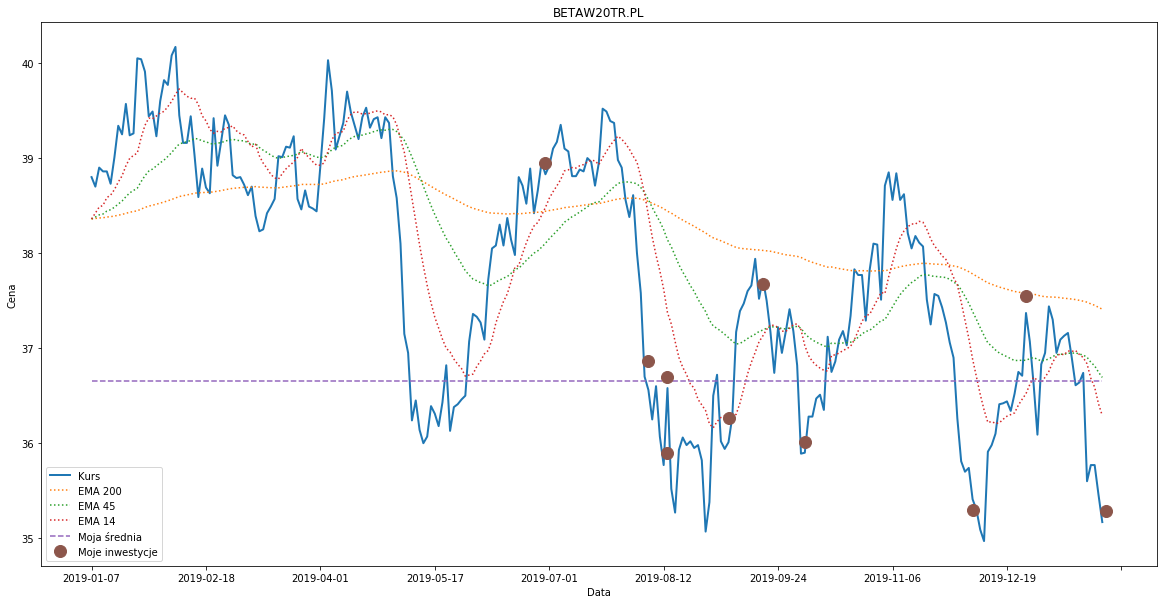

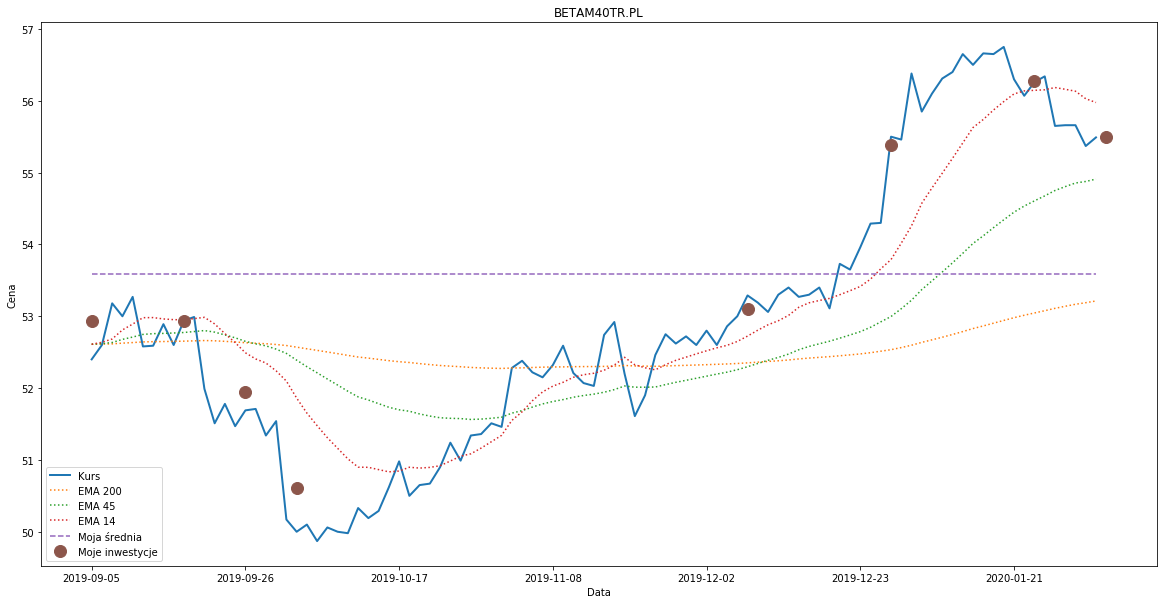

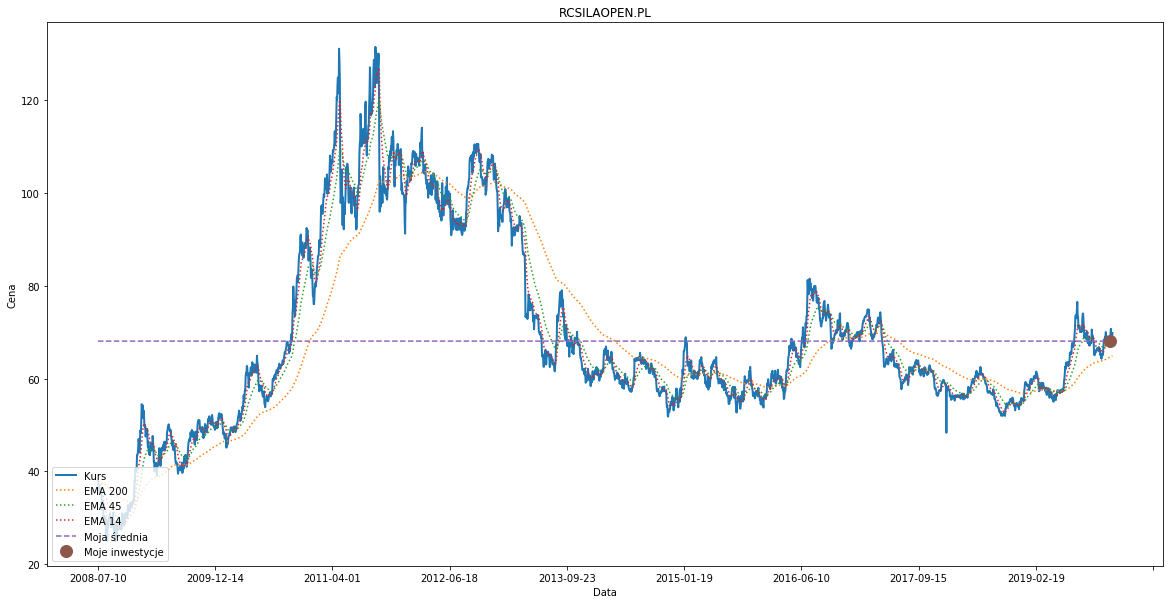

In [38]:
for ticker in tickers:
    df = ticker['df']
    
    ticker_transactions = my_transactions[my_transactions['Ticker'] == ticker['name']]
    
    fig, ax = plt.subplots(figsize=(20, 10))

    y_mean = [df['Zamkniecie'].mean()] * len(df)
    y_mean = [ticker_transactions['Cena'].mean()] * len(df)
    
    ax.plot(df['Zamkniecie'], label='Kurs', marker='', linewidth=2)
    ax.plot(df['EMA200'], label='EMA 200', linestyle='dotted')
    ax.plot(df['EMA45'], label='EMA 45', linestyle='dotted')
    ax.plot(df['EMA14'], label='EMA 14', linestyle='dotted')
    ax.plot(y_mean, label='Moja średnia', linestyle='--')
    ax.plot(ticker_transactions['Cena'], label='Moje inwestycje', linestyle='none', marker='o', markersize=12)

    ax.legend(loc='lower left')
    ax.set(xlabel="Data", ylabel="Cena", title=ticker['name'])
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))

    plt.show()